In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./data/zomato-data.csv")
df.set_index("Unnamed: 0", inplace=True)
df.index = df.index.rename("")
df.sample(5)

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
,,,,,,,,,,,,
18923,Taj Mughalai,250,"North Indian,Chinese,Mughlai",Chennai,Kolathur,https://www.zomato.com/chennai/taj-mughalai-ko...,114,Quick Bites,11am to 11pm(Mon-Sun),Average,3.0,35
68631,Brunch Restaurant,350,"South Indian,Beverages,Mughlai,Chinese",Lucknow,Gomti Nagar,https://www.zomato.com/lucknow/brunch-restaura...,86,Quick Bites,630am to 1030pm(Mon-Sun),Average,3.1,8
79260,Kailash Fast Food,300,"Chinese,North Indian",Mumbai,Mahakali,https://www.zomato.com/mumbai/kailash-fast-foo...,558,Quick Bites,730am to 11pm(Mon-Sun),Average,3.4,11
90531,Rainforest Resto Bar,1900,"North Indian,Chinese,Continental,Mughlai,Itali...",Pune,Phoenix Market City-- Viman Nagar,https://www.zomato.com/pune/rainforest-resto-b...,12,Bar,12noon to 12midnight(Mon-Sun),Good,3.9,1858
47397,Home Point,300,North Indian,Gwalior,Lashkar,https://www.zomato.com/gwalior/home-point-lash...,17,Bhojanalya,9am to 9pm(Mon-Sun),Not rated,-,-


In [3]:
df.shape

(105623, 12)

# Data Cleaning

In [4]:
df.isnull().sum()

NAME                 0
PRICE                0
CUSINE_CATEGORY     65
CITY                 0
REGION               0
URL                  0
PAGE NO              0
CUSINE TYPE          0
TIMING             641
RATING_TYPE          0
RATING               0
VOTES                0
dtype: int64

### Removing the Unnecessary columns

In [5]:
df.drop(columns=["NAME","URL","TIMING","REGION"], inplace=True)
df.head()

,PRICE,CUSINE_CATEGORY,CITY,PAGE NO,CUSINE TYPE,RATING_TYPE,RATING,VOTES
,,,,,,,,
0,1000,"North Indian,Continental,Italian",Agra,1,Casual Dining,Excellent,4.8,273
1,300,"Desserts,Bakery,Fast Food,South Indian",Agra,1,Quick Bites,Very Good,4.3,554
2,700,"North Indian,South Indian,Mithai,Street Food,D...",Agra,1,Quick Bites,Very Good,4.4,645
3,600,"North Indian,Mughlai,Rolls,Chinese,Fast Food,S...",Agra,1,Quick Bites,Very Good,4.3,894
4,500,"North Indian,Fast Food,Chinese,South Indian",Agra,1,Quick Bites,Very Good,4.1,489


### Cleaning the CITY values

In [6]:
df["CITY"].unique()

array(['Agra', 'Ahmedabad', 'Ajmer', 'Alappuzha', 'Allahabad', 'Amravati',
       'Amritsar', 'Aurangabad', 'Bengaluru', 'Bhopal', 'Bhubaneswar',
       'Chandigarh', 'Chennai', 'Coimbatore', 'Cuttack', 'Darjeeling',
       'Dehradun', 'Delhi NCR', 'Dharamshala', 'Gangtok', 'Goa',
       'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior', 'Haridwar',
       'Hyderabad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu',
       'Jamnagar', 'Jamshedpur', 'Jhansi', 'Jodhpur', 'Kanpur', 'Kochi',
       'Kolhapur', 'Kolkata', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Meerut', 'Mumbai', 'Mussoorie',
       'Mysore', 'Nagpur', 'Nainital', 'Nashik', 'Neemrana', 'Ooty',
       'Palakkad', 'Patiala', 'Patna', 'Puducherry', 'Pune', 'Pushkar',
       'Raipur', 'Rajkot', 'Ranchi', 'Rishikesh', 'Salem', 'Shimla',
       'Siliguri', 'Srinagar', 'Surat', 'Thrissur', 'Tirupati', 'Trichy',
       'Trivandrum', 'Udaipur', 'Vadodara', 'Varanasi', 'Vellore',
       'V

In [7]:
df["CITY"].value_counts().shape

(81,)

### Cleaning the PRICE column

In [8]:
df.PRICE.unique()

array([1000,  300,  700,  600,  500, 1600, 1200,  400,  200,  650,  100,
       1150,  800,  150,  250,  220, 1500, 1800,  900,  350,    0,  850,
        450, 1250,  550, 1100,  750, 1400,   60, 2000,   50,  560, 1300,
        120, 1900,  160,  280,  320,   80,  470,   20,  180,  440, 1700,
       1350,  950,  140, 3000,  130,  240, 2100,  190,  469,  360,  199,
       2500,    2,   90,  170,   70,  123,  175, 2600,  161, 2200, 1050,
       2400, 2700, 1550,  260,  575,  282,  216,  770,  149, 1850,  249,
       1750,  299,  370, 3600, 2300, 1650, 6000, 4000,  135,  495, 3500,
        387,  125,  233, 5100, 2900,  306, 5000,  230,   75,  348,  225,
        802,   40,  313,   45,   30,  236, 1450,  139,  151,  375,  330,
        620,  999, 3200,  505,  920,  398,  340,    5,  480,  580, 3502,
        248,  404,  445,  485, 4500,  481,  326,   15,  420,  115,  208,
        940,  520,  294], dtype=int64)

Replacing all the values less than 30 to 30

In [9]:
def updatePrice(price):
    if(price < 30):
         return 30
    else:
        return price

df["PRICE"] = df["PRICE"].apply(updatePrice)
df.PRICE.unique()

array([1000,  300,  700,  600,  500, 1600, 1200,  400,  200,  650,  100,
       1150,  800,  150,  250,  220, 1500, 1800,  900,  350,   30,  850,
        450, 1250,  550, 1100,  750, 1400,   60, 2000,   50,  560, 1300,
        120, 1900,  160,  280,  320,   80,  470,  180,  440, 1700, 1350,
        950,  140, 3000,  130,  240, 2100,  190,  469,  360,  199, 2500,
         90,  170,   70,  123,  175, 2600,  161, 2200, 1050, 2400, 2700,
       1550,  260,  575,  282,  216,  770,  149, 1850,  249, 1750,  299,
        370, 3600, 2300, 1650, 6000, 4000,  135,  495, 3500,  387,  125,
        233, 5100, 2900,  306, 5000,  230,   75,  348,  225,  802,   40,
        313,   45,  236, 1450,  139,  151,  375,  330,  620,  999, 3200,
        505,  920,  398,  340,  480,  580, 3502,  248,  404,  445,  485,
       4500,  481,  326,  420,  115,  208,  940,  520,  294], dtype=int64)

### Cleaning the CUSINE CATEGORY Column

In [10]:
df["CUSINE_CATEGORY"].unique()

array(['North Indian,Continental,Italian',
       'Desserts,Bakery,Fast Food,South Indian',
       'North Indian,South Indian,Mithai,Street Food,Desserts', ...,
       'Cafe,Continental,Mexican,Italian,Pizza,Chinese,Indian,Beverages',
       'Mithai,Chinese,Indian',
       'Bakery,Desserts,Fast Food,Biryani,Chinese'], dtype=object)

In [11]:
df["CUSINE_CATEGORY"].value_counts()

North Indian                                 11150
North Indian,Chinese                          7036
Fast Food                                     5709
Chinese                                       2870
South Indian                                  2693
                                             ...  
Cafe,Korean,Sushi                                1
Biryani,Chinese,Momos                            1
North Indian,Continental,Salad                   1
North Indian,Arabian,Afghan,Chinese              1
Bakery,Desserts,Fast Food,Biryani,Chinese        1
Name: CUSINE_CATEGORY, Length: 13265, dtype: int64

In [12]:
df["CUSINE_CATEGORY"].unique().shape

(13266,)

In [13]:
def updateCusine(cusine):
    if "," in str(cusine):
        return cusine.split(",")[0]
    else:
        return cusine

df["CUSINE_CATEGORY"] = df["CUSINE_CATEGORY"].apply(updateCusine)
df["CUSINE_CATEGORY"].unique().shape

(120,)

In [14]:
df["CUSINE_CATEGORY"].value_counts().tail(105)
# 100 cusine category have frequency less  than 900

Ice Cream        1404
Italian          1138
Maharashtrian     997
Burger            884
Healthy Food      845
                 ... 
Grill               1
Russian             1
Australian          1
Tex-Mex             1
Afghani             1
Name: CUSINE_CATEGORY, Length: 105, dtype: int64

In [15]:
category_counts = df['CUSINE_CATEGORY'].value_counts()
categories_to_rename = category_counts[category_counts < 900].index.tolist()
rename_mapping = {category: 'Other' for category in categories_to_rename}
df['CUSINE_CATEGORY'].replace(rename_mapping, inplace=True)

In [16]:
df["CUSINE_CATEGORY"].isna().sum()

65

In [17]:
df = df[df["CUSINE_CATEGORY"].isna() == False]
df

,PRICE,CUSINE_CATEGORY,CITY,PAGE NO,CUSINE TYPE,RATING_TYPE,RATING,VOTES
,,,,,,,,
0,1000,North Indian,Agra,1,Casual Dining,Excellent,4.8,273
1,300,Desserts,Agra,1,Quick Bites,Very Good,4.3,554
2,700,North Indian,Agra,1,Quick Bites,Very Good,4.4,645
3,600,North Indian,Agra,1,Quick Bites,Very Good,4.3,894
4,500,North Indian,Agra,1,Quick Bites,Very Good,4.1,489
...,...,...,...,...,...,...,...,...
105618,800,Other,Visakhapatnam,9,Quick Bites,Good,3.8,210
105619,800,South Indian,Visakhapatnam,9,Casual Dining,Very Good,4.1,131
105620,400,Biryani,Visakhapatnam,9,Quick Bites,Good,3.8,97


In [18]:
df["CUSINE_CATEGORY"].value_counts()

North Indian     34819
Other            11825
Fast Food        11353
Chinese          10872
South Indian      6598
Bakery            5518
Biryani           3955
Cafe              3491
Desserts          2711
Street Food       2604
Pizza             1967
Mithai            1744
Beverages         1718
Continental       1425
Mughlai           1419
Ice Cream         1404
Italian           1138
Maharashtrian      997
Name: CUSINE_CATEGORY, dtype: int64

### Cleaning the RATING TYPE column

In [19]:
df["RATING_TYPE"].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Poor', 'None',
       'Not rated', 'Sangat Baik', 'Veľmi dobré', 'Baik', 'Bom',
       'Çok iyi', 'İyi', 'Buono', 'Média', 'Dobré', 'Velmi dobré',
       'Ottimo', 'Bueno', 'Promedio', 'Excelente', 'Muito bom',
       'Ortalama', 'Vynikajúce', 'Muito Bom', 'Muy Bueno', 'Media',
       'Skvělá volba', 'Průměr', 'Średnio', 'Wybitnie', 'Skvělé',
       'Eccellente', 'Biasa', 'Dobrze', 'Bardzo dobrze', 'Terbaik',
       'Priemer', 'Nedostatek hlasů'], dtype=object)

In [20]:
df[(df["RATING_TYPE"] == "Not rated") | (df["RATING_TYPE"] == "None")].shape

(29159, 8)

In [21]:
rating_types = {
    "Sangat Baik":"Very Good",
    "Veľmi dobré":"Very Good",
    "Baik":"Good",
    "Bom":"Average",
    "Çok iyi":"Very Good",
    "İyi":"Good",
    "Buono":"Good",
    "Média":"Average",
    "Dobré":"Good",
    "Velmi dobré":"Very Good",
    "Ottimo":"Good",
    "Bueno":"Good",
    "Promedio":"Average",
    "Excelente":"Excellent",
    "Muito bom":"Very Good",
    "Ortalama":"Average",
    "Vynikajúce":"Excellent",
    "Muito Bom":"Very Good",
    "Muy Bueno":"Very Good",
    "Media":"Average",
    "Skvělá volba":"Very Good",
    "Průměr":"Average",
    "Średnio":"Average",
    "Wybitnie":"Good",
    "Skvělé":"Very Good",
    "Eccellente":"Excellent",
    "Biasa":"Average",
    "Dobrze":"Average",
    "Bardzo dobrze":"Very Good",
    "Terbaik":"Very Good",
    "Terbaik":"Very Good",
    "Nedostatek hlasů":"Average",
    "Priemer":"Average",
    "Not rated":"Not rated",
    "None":"Not rated"
}
df = df.replace(rating_types)

In [22]:
df["RATING_TYPE"].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Poor', 'Not rated'],
      dtype=object)

In [23]:
df["RATING_TYPE"] = df["RATING_TYPE"].replace({
    "Poor": 0,
    "Not rated": 1,
    "Average": 2,
    "Good": 3,
    "Very Good": 4,
    "Excellent": 5
})
df

,PRICE,CUSINE_CATEGORY,CITY,PAGE NO,CUSINE TYPE,RATING_TYPE,RATING,VOTES
,,,,,,,,
0,1000,North Indian,Agra,1,Casual Dining,5,4.8,273
1,300,Desserts,Agra,1,Quick Bites,4,4.3,554
2,700,North Indian,Agra,1,Quick Bites,4,4.4,645
3,600,North Indian,Agra,1,Quick Bites,4,4.3,894
4,500,North Indian,Agra,1,Quick Bites,4,4.1,489
...,...,...,...,...,...,...,...,...
105618,800,Other,Visakhapatnam,9,Quick Bites,3,3.8,210
105619,800,South Indian,Visakhapatnam,9,Casual Dining,4,4.1,131
105620,400,Biryani,Visakhapatnam,9,Quick Bites,3,3.8,97


In [24]:
df["RATING_TYPE"].unique()

array([5, 4, 3, 2, 0, 1], dtype=int64)

### Cleaning the RATING column

In [25]:
df["RATING"].unique()

array(['4.8', '4.3', '4.4', '4.1', '4.7', '3.9', '4.5', '4.0', '3.8',
       '3.5', '3.7', '3.4', '3.6', '2.4', '2.8', 'NEW', '3.0', '3.1',
       '3.2', '-', '3.3', '2.7', '2.5', '2.9', '4.2', '4.6', 'Opening',
       '2.3', '2.6', '4.9', '2.1', '2.2', '2.0', 'Temporarily', '1.8'],
      dtype=object)

In [26]:
df["RATING"] = df["RATING"].replace({
    "-":"2.0",
    "NEW":"2.0",
    "Opening":"2.0",
    "Temporarily":"2.0"
})
df["RATING"].unique()

array(['4.8', '4.3', '4.4', '4.1', '4.7', '3.9', '4.5', '4.0', '3.8',
       '3.5', '3.7', '3.4', '3.6', '2.4', '2.8', '2.0', '3.0', '3.1',
       '3.2', '3.3', '2.7', '2.5', '2.9', '4.2', '4.6', '2.3', '2.6',
       '4.9', '2.1', '2.2', '1.8'], dtype=object)

In [27]:
df["RATING"] = df["RATING"].apply(float)
df["RATING"].unique()

array([4.8, 4.3, 4.4, 4.1, 4.7, 3.9, 4.5, 4. , 3.8, 3.5, 3.7, 3.4, 3.6,
       2.4, 2.8, 2. , 3. , 3.1, 3.2, 3.3, 2.7, 2.5, 2.9, 4.2, 4.6, 2.3,
       2.6, 4.9, 2.1, 2.2, 1.8])

### Cleaning the VOTES column

In [28]:
df["VOTES"].unique()

array(['273', '554', '645', ..., '1835', '1475', '1386'], dtype=object)

In [29]:
df["VOTES"].str.isnumeric().sum(), df["VOTES"].shape

(76398, (105558,))

In [30]:
df[df["VOTES"].str.isnumeric() == False]["VOTES"].unique()

array(['NEW', '-', 'Opening', 'Temporarily'], dtype=object)

In [31]:
df["VOTES"] = df["VOTES"].replace({
    "NEW": "0",
    "-":"0",
    "Opening":"0",
    "Temporarily":"0",
})
df[df["VOTES"].str.isnumeric() == False]["VOTES"].unique()

array([], dtype=object)

In [32]:
df["VOTES"] = df["VOTES"].apply(float)

In [33]:
df["VOTES"]


0         273.0
1         554.0
2         645.0
3         894.0
4         489.0
          ...  
105618    210.0
105619    131.0
105620     97.0
105621    132.0
105622    219.0
Name: VOTES, Length: 105558, dtype: float64

### Removing the Outliers

In [34]:
df

,PRICE,CUSINE_CATEGORY,CITY,PAGE NO,CUSINE TYPE,RATING_TYPE,RATING,VOTES
,,,,,,,,
0,1000,North Indian,Agra,1,Casual Dining,5,4.8,273.0
1,300,Desserts,Agra,1,Quick Bites,4,4.3,554.0
2,700,North Indian,Agra,1,Quick Bites,4,4.4,645.0
3,600,North Indian,Agra,1,Quick Bites,4,4.3,894.0
4,500,North Indian,Agra,1,Quick Bites,4,4.1,489.0
...,...,...,...,...,...,...,...,...
105618,800,Other,Visakhapatnam,9,Quick Bites,3,3.8,210.0
105619,800,South Indian,Visakhapatnam,9,Casual Dining,4,4.1,131.0
105620,400,Biryani,Visakhapatnam,9,Quick Bites,3,3.8,97.0


In [35]:
df.describe()

,PRICE,PAGE NO,RATING_TYPE,RATING,VOTES
count,105558.000000,105558.000000,105558.000000,105558.000000,105558.000000
mean,417.191951,262.993899,2.192425,3.072028,102.968955
std,271.068487,311.640930,0.971010,0.748097,334.645330
min,30.000000,1.000000,0.000000,1.800000,0.000000
25%,250.000000,32.000000,1.000000,2.000000,0.000000
50%,350.000000,126.000000,2.000000,3.300000,18.000000
75%,500.000000,391.000000,3.000000,3.600000,76.000000
max,6000.000000,1308.000000,5.000000,4.900000,41344.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105558 entries, 0 to 105622
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PRICE            105558 non-null  int64  
 1   CUSINE_CATEGORY  105558 non-null  object 
 2   CITY             105558 non-null  object 
 3   PAGE NO          105558 non-null  int64  
 4   CUSINE TYPE      105558 non-null  object 
 5   RATING_TYPE      105558 non-null  int64  
 6   RATING           105558 non-null  float64
 7   VOTES            105558 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 7.2+ MB


<AxesSubplot: >

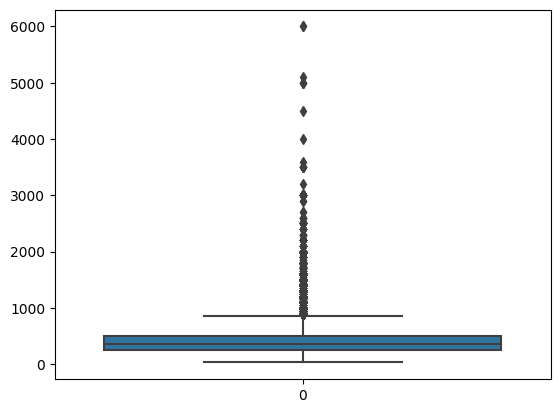

In [37]:
sns.boxplot(df["PRICE"])

In [38]:
q1 = df["PRICE"].quantile(.25)
q3 = df["PRICE"].quantile(.75)

iqr = q3-q1

lowerExtreme = q1-1.5*iqr
upperExtreme = q3+1.5*iqr

lowerExtreme, upperExtreme

df[((df["PRICE"] < upperExtreme) & (df["PRICE"] > lowerExtreme)) == False].shape

(5759, 8)

In [39]:
df = df[(df["PRICE"] < upperExtreme) & (df["PRICE"] > lowerExtreme)]
df.shape

(99799, 8)

In [40]:
df.describe()

,PRICE,PAGE NO,RATING_TYPE,RATING,VOTES
count,99799.000000,99799.000000,99799.000000,99799.000000,99799.000000
mean,370.460997,269.784326,2.138378,3.035683,80.487810
std,171.800203,314.555803,0.939944,0.737773,261.994946
min,30.000000,1.000000,0.000000,1.800000,0.000000
25%,250.000000,34.000000,1.000000,2.000000,0.000000
50%,350.000000,134.000000,2.000000,3.200000,16.000000
75%,500.000000,404.000000,3.000000,3.600000,66.000000
max,850.000000,1308.000000,5.000000,4.900000,41344.000000


# Analyzing the data

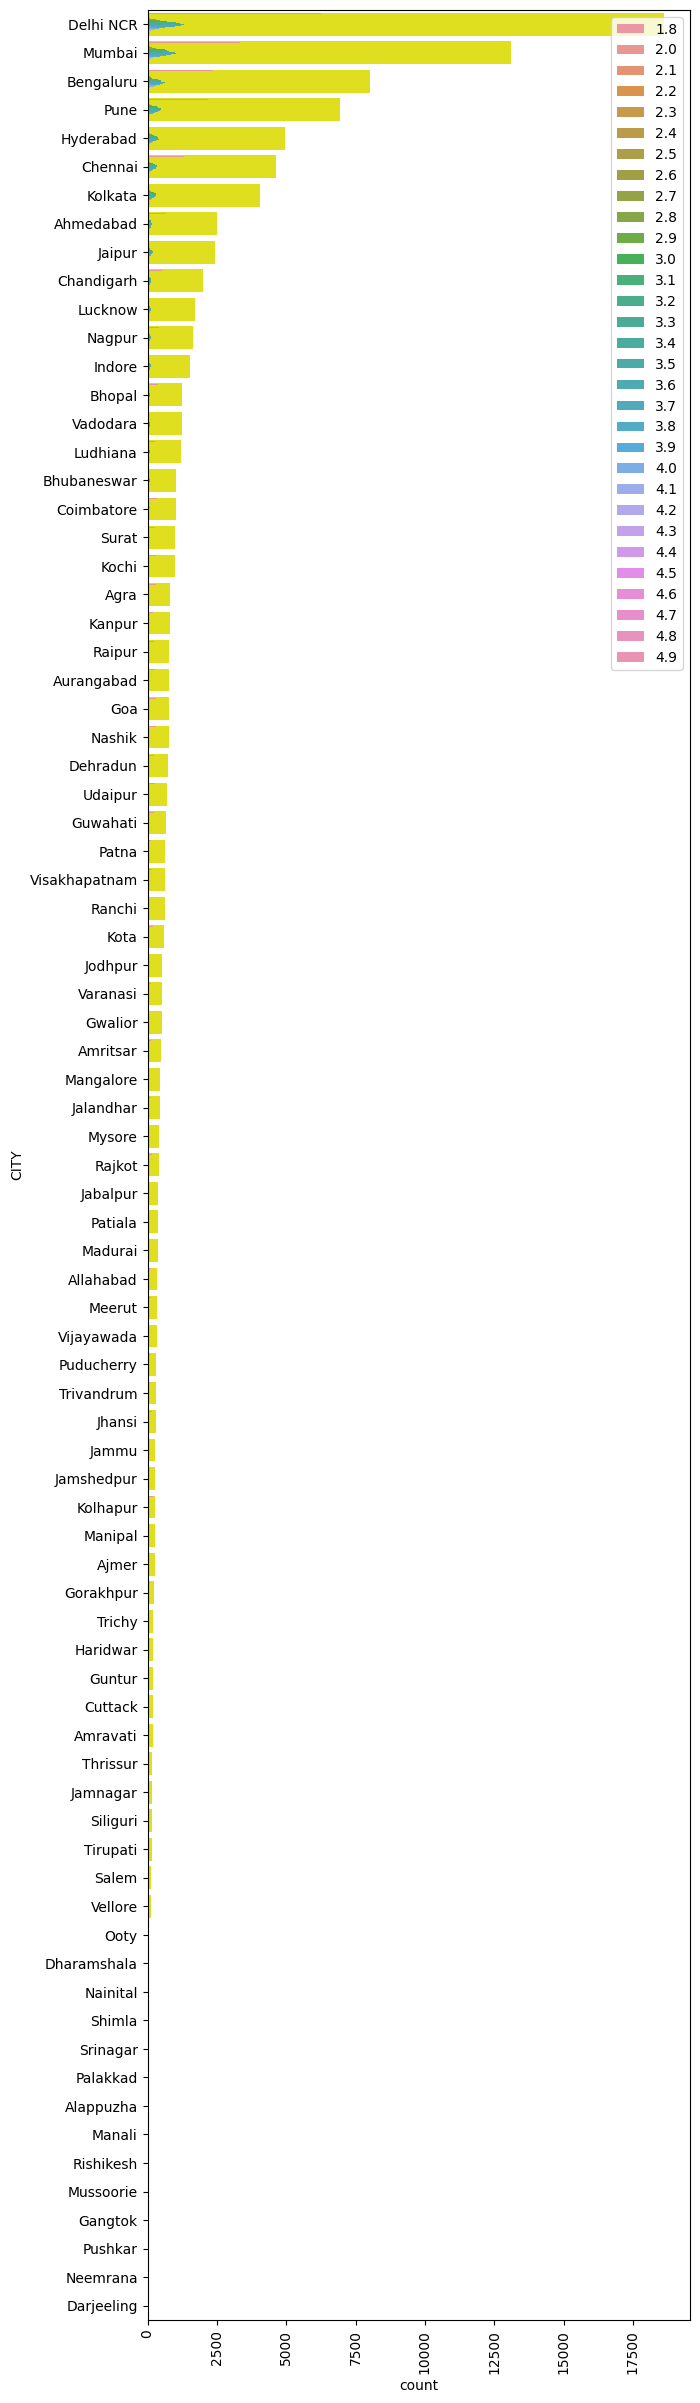

In [41]:
plt.figure(figsize=(7,30))
sns.countplot(data=df, y="CITY", order=df['CITY'].value_counts().index, color="yellow")
sns.countplot(data=df, y="CITY", order=df['CITY'].value_counts().index, hue="RATING")
plt.legend(loc="upper right")
plt.xticks(rotation=90);

**Insights**:
- The most amount of resturants associated with zomato are in Delhi NCR, Mumbai and Bengaluru
- There are very less amount of highly rated resturants associated with zomato in popular cities like Kanpur, Goa, Agra, Bhopal. So, these cities may be ideal for opening a resturant and getting associated with zomato

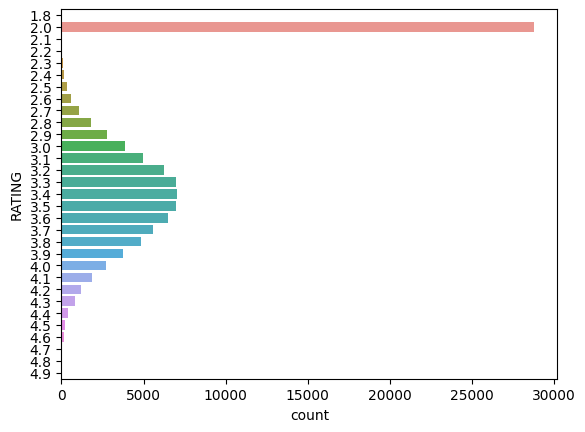

In [42]:
plt.figure()
sns.countplot(data=df, y="RATING")
plt.show()

**Insights**:
- Most of the restaurants are either not rated or have ratings less than 2.5
- The ratings are normally distributed
- The average rating of a restaurant is around 3.5

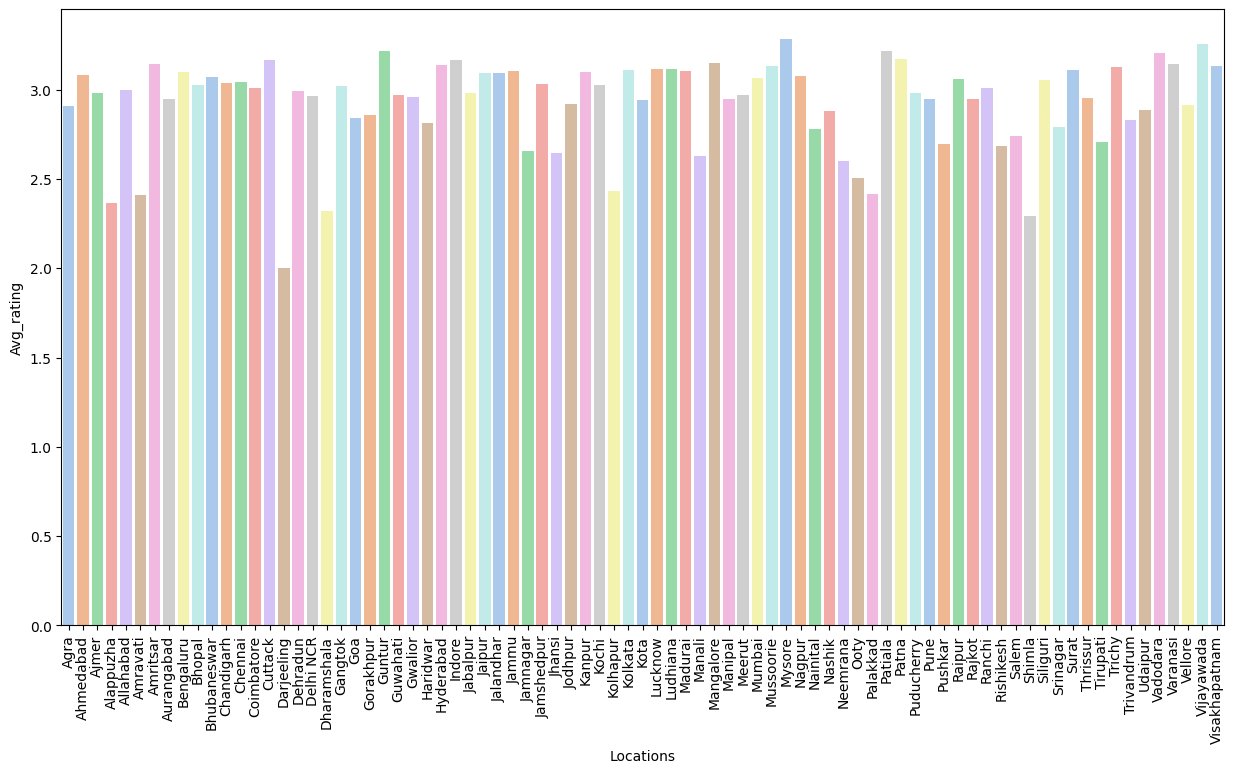

In [43]:
avg_rating = df.groupby("CITY")["RATING"].mean()
location_rating = pd.DataFrame({"Avg_rating":avg_rating,"Locations":df.groupby(["CITY"]).count().index})
plt.figure(figsize=(15,8))
sns.barplot(x="Locations",y="Avg_rating",data=location_rating,palette="pastel")
plt.xticks(rotation=90);

**Insights**:
- The average rating of a resturant in almost all cities may vary between 2.5 and 3.5
- The cities which have average ratings below 2.5 may have customer dissatisfaction, therefore a good resturant may be a great idea in areas like Shimla, Kolhapur, Darjeeling

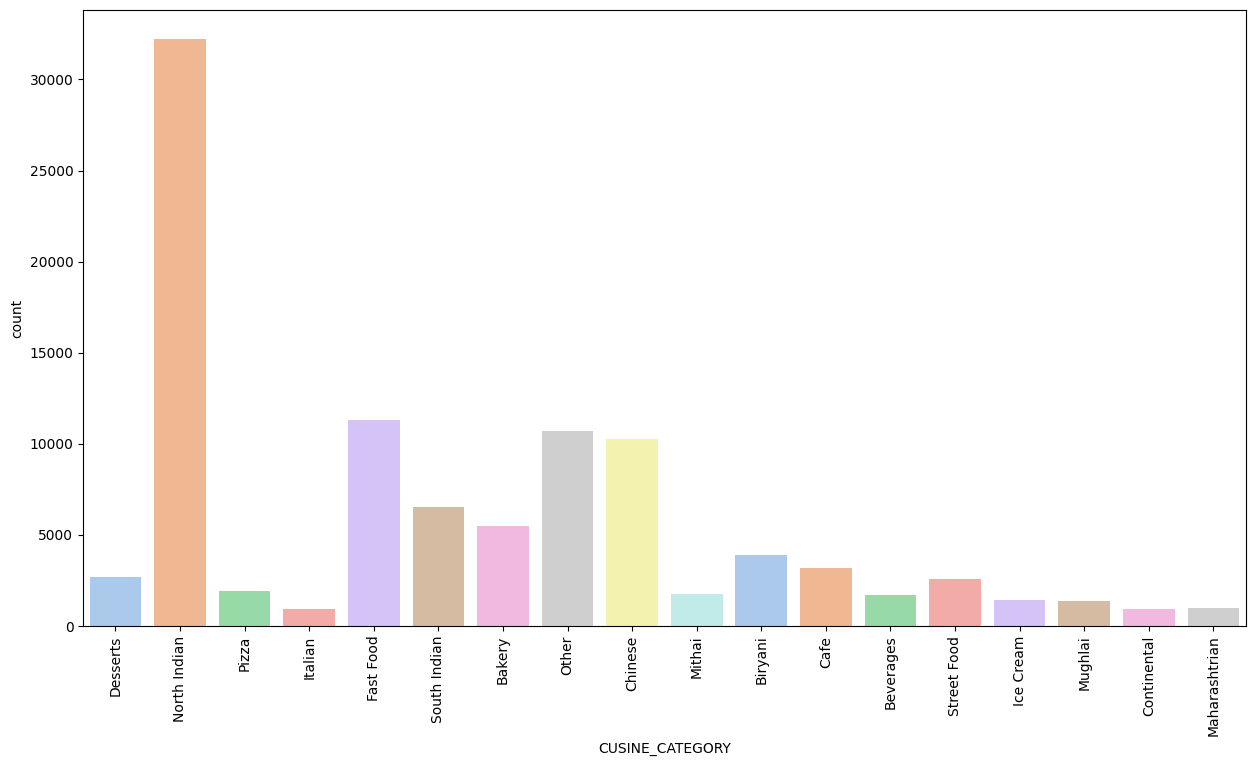

In [44]:
plt.figure(figsize=(15,8))
sns.countplot(x=df["CUSINE_CATEGORY"],palette="pastel")
plt.xticks(rotation=90);

**Insights**:
- North Indian Foods are the most common cusine among all the other categories
- Fast Food and Chinese are the second most popular types resturants in India

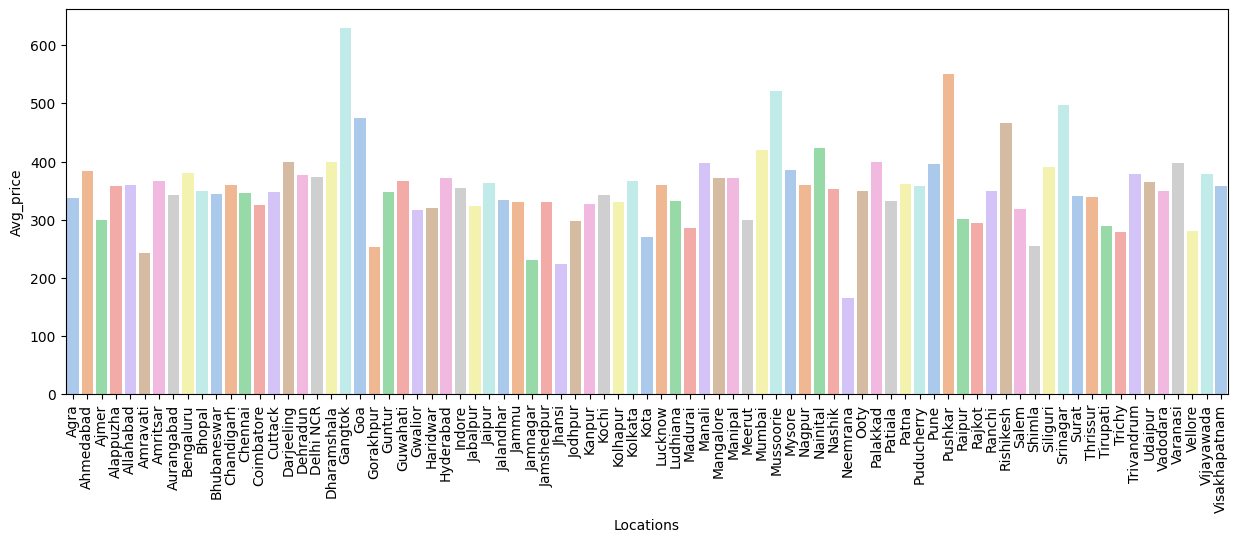

In [56]:
avg_price = df.groupby("CITY")["PRICE"].mean()
location_price = pd.DataFrame({"Avg_price":avg_price,"Locations":df.groupby(["CITY"]).count().index})
plt.figure(figsize=(15,5))
sns.barplot(x="Locations",y="Avg_price",data=location_price,palette="pastel")
plt.xticks(rotation=90)
plt.show()

**Insights**:
- The average price of food is the highest in Gangtok by a large margin of around 300, So, a resturant may increase there revenue by giving discounts and initiating schemes and offers.
- There average price of almost all the country ranges between 250 and 400

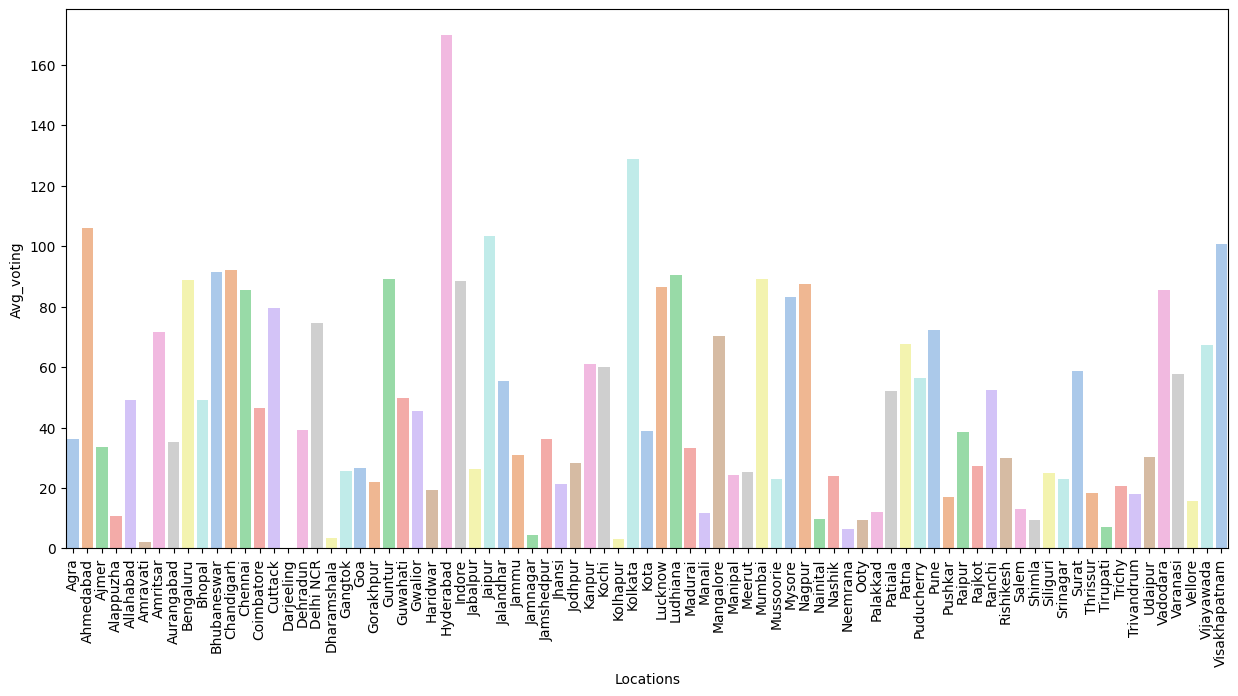

In [57]:
avg_voting = df.groupby("CITY")["VOTES"].mean()
location_voting = pd.DataFrame({"Avg_voting":avg_voting,"Locations":df.groupby(["CITY"]).count().index})
plt.figure(figsize=(15,7))
sns.barplot(x="Locations",y="Avg_voting",data=location_voting,palette="pastel")
plt.xticks(rotation=90);

**Insights**:
- The people of Hyderabad, Kolkata and Ahmedabad rate the resturants more frequently than people of other cities

<AxesSubplot: >

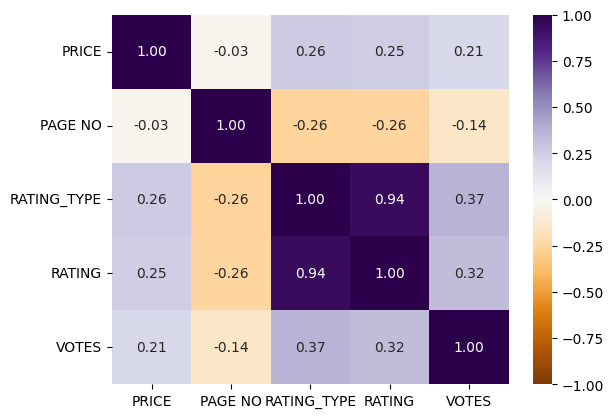

In [47]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", vmin=-1, vmax=1, cmap="PuOr")

**Insights**:
- There is a very good relation betwen rating and rating_type ( A good thing )
- Page number is has a negative correlation with rating, which means that as the page no. increases the rating of the resturant decreases

# Data Splitting

In [48]:
df.head()

,PRICE,CUSINE_CATEGORY,CITY,PAGE NO,CUSINE TYPE,RATING_TYPE,RATING,VOTES
,,,,,,,,
1,300,Desserts,Agra,1,Quick Bites,4,4.3,554.0
2,700,North Indian,Agra,1,Quick Bites,4,4.4,645.0
3,600,North Indian,Agra,1,Quick Bites,4,4.3,894.0
4,500,North Indian,Agra,1,Quick Bites,4,4.1,489.0
7,700,Pizza,Agra,1,Quick Bites,3,3.9,583.0


Predicting the rating of the resturant using linear regression:

In [49]:
x = df.drop(columns=["RATING"], axis = 1)
y = df["RATING"]

In [50]:
x.drop(columns=["CUSINE_CATEGORY","CITY","CUSINE TYPE"], axis=1, inplace=True)
x

,PRICE,PAGE NO,RATING_TYPE,VOTES
,,,,
1,300,1,4,554.0
2,700,1,4,645.0
3,600,1,4,894.0
4,500,1,4,489.0
7,700,1,3,583.0
...,...,...,...,...
105618,800,9,3,210.0
105619,800,9,4,131.0
105620,400,9,3,97.0


In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(x)
x

array([[-0.41013543, -0.85449281,  1.9805768 ,  1.80734235],
       [ 1.9181622 , -0.85449281,  1.9805768 ,  2.15467904],
       [ 1.33608779, -0.85449281,  1.9805768 ,  3.10508381],
       ...,
       [ 0.17193898, -0.82906   ,  0.91667825,  0.06302516],
       [ 1.33608779, -0.82906   ,  0.91667825,  0.19661619],
       [ 1.04505059, -0.82906   ,  0.91667825,  0.52868533]])

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=28)

## Modeling

In [53]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [54]:
y_pred = model.predict(x_test)
y_pred

array([2.92345758, 2.92923814, 3.67814456, ..., 3.64157481, 2.94470718,
       2.90408862])

## Evaluating the Model

In [55]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

r2, mse, rmse

(0.8895153133612491, 0.05965206782582876, 0.24423772809668198)